# Interrupted time series - with no additional predictor variables

In [1]:
import arviz as az
import matplotlib.pyplot as plt

from causal_impact.simulate_data import generate_time_series_data_simple
from causal_impact.models import LinearModel

In [2]:
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = 'retina'

In [3]:
%load_ext autoreload
%autoreload 2

## Generate simulated dataset

In [4]:
treatment_time = "2017-01-01"

df = generate_time_series_data_simple(treatment_time, slope=0.0)
df.head()

,linear_trend,timeseries,causal effect,intercept
date,,,,
2010-01-31,0,-0.336558,0,1.0
2010-02-28,1,-0.042542,0,1.0
2010-03-31,2,-0.125490,0,1.0
2010-04-30,3,-0.301326,0,1.0
2010-05-31,4,-0.404588,0,1.0


Create some useful visualisations

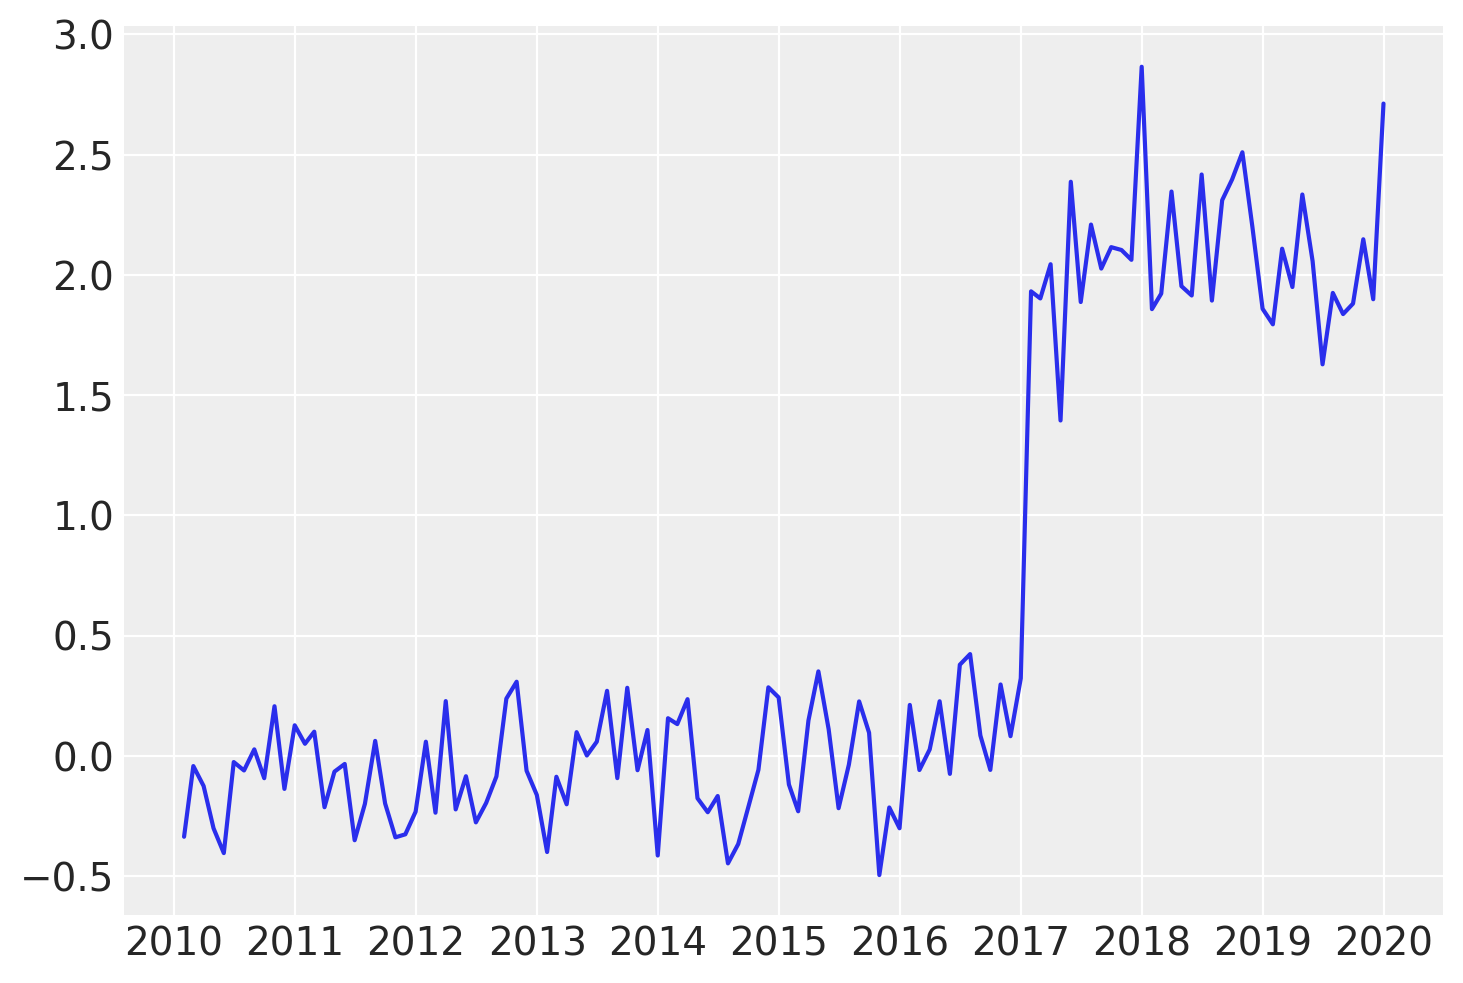

In [5]:
plt.plot(df.index, df['timeseries'])

In [6]:
# SPLIT INTO OBSERVED PRE-TREATMENT DATA
data = (df[df.index < treatment_time]
        .loc[:,["intercept", "linear_trend", "timeseries"]])
data

,intercept,linear_trend,timeseries
date,,,
2010-01-31,1.0,0,-0.336558
2010-02-28,1.0,1,-0.042542
2010-03-31,1.0,2,-0.125490
2010-04-30,1.0,3,-0.301326
2010-05-31,1.0,4,-0.404588
...,...,...,...
2016-08-31,1.0,79,0.084683
2016-09-30,1.0,80,-0.058504
2016-10-31,1.0,81,0.296760


In [7]:
# SPLIT INTO OBSERVED POST-TREATMENT DATA
predict_data = (df[df.index >= treatment_time]
                .loc[:,["intercept", "linear_trend", "timeseries"]])
predict_data.head()

,intercept,linear_trend,timeseries
date,,,
2017-01-31,1.0,84,1.931686
2017-02-28,1.0,85,1.902144
2017-03-31,1.0,86,2.044428
2017-04-30,1.0,87,1.394634
2017-05-31,1.0,88,2.387390


## Build model

In [8]:
model_config = {"predictor_vars":  ["intercept", "linear_trend"], 
                "target_var": "timeseries"}

sampler_config = {}

model = LinearModel(model_config, sampler_config, data)

## Fit

In [9]:
model.idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


## Post-treatment prediction

In [10]:
# PREDICTION
forecast = model.predict(predict_data)

## Visualise results

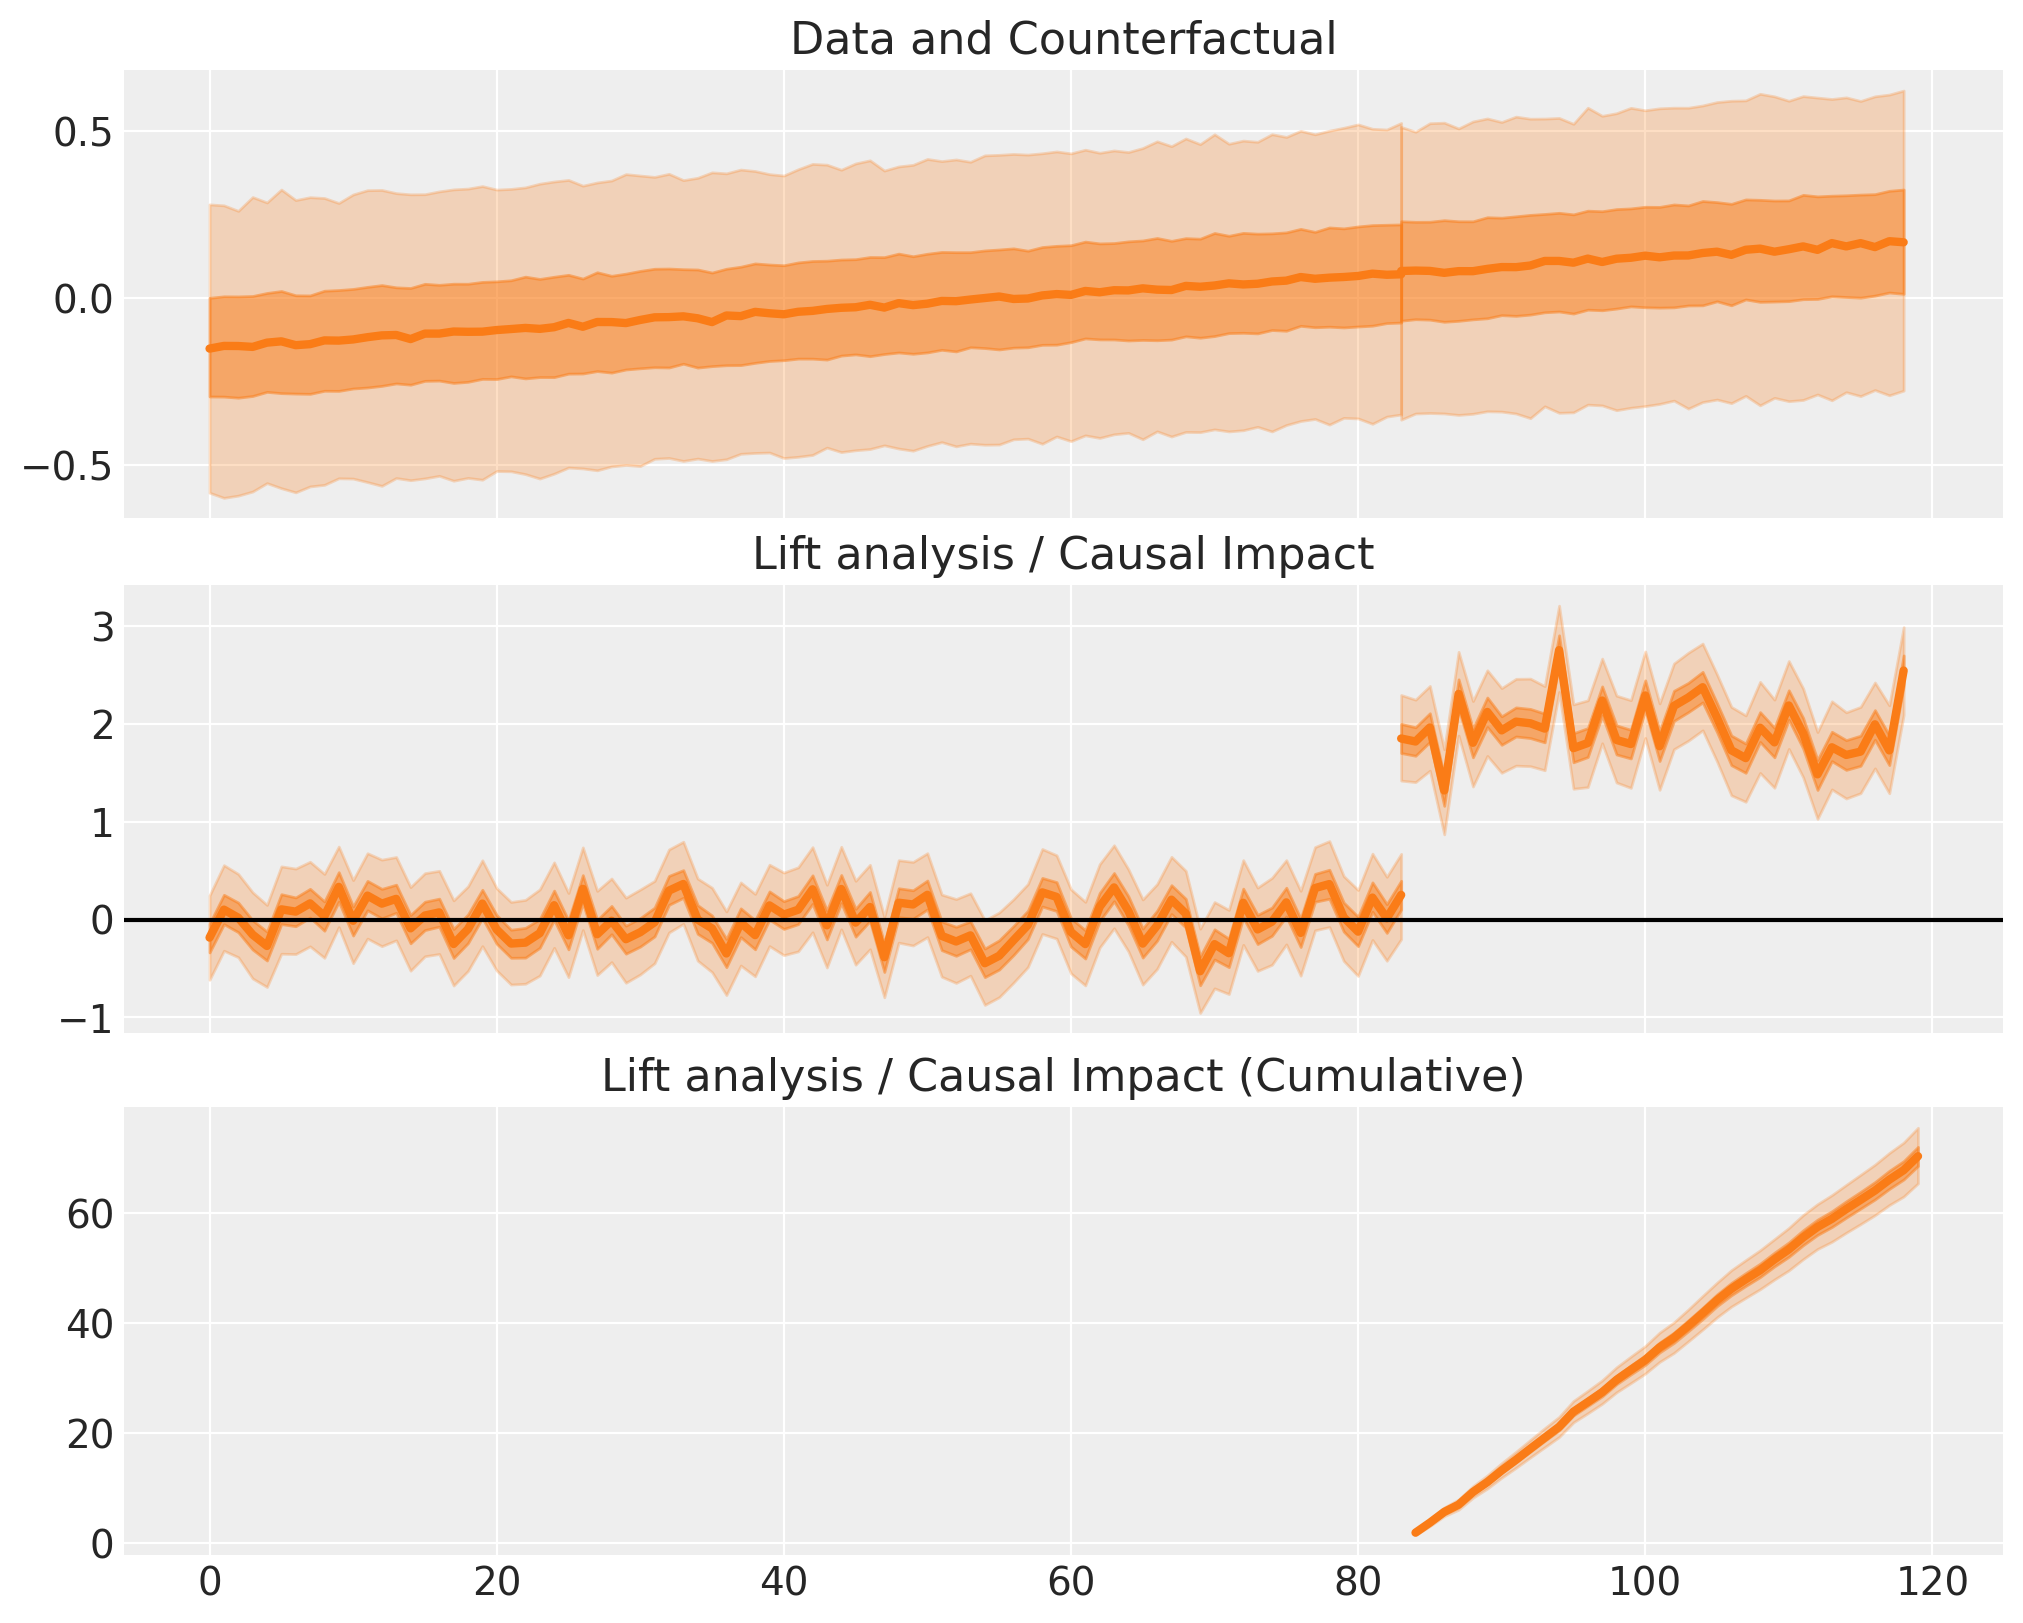

In [11]:
model.plot()

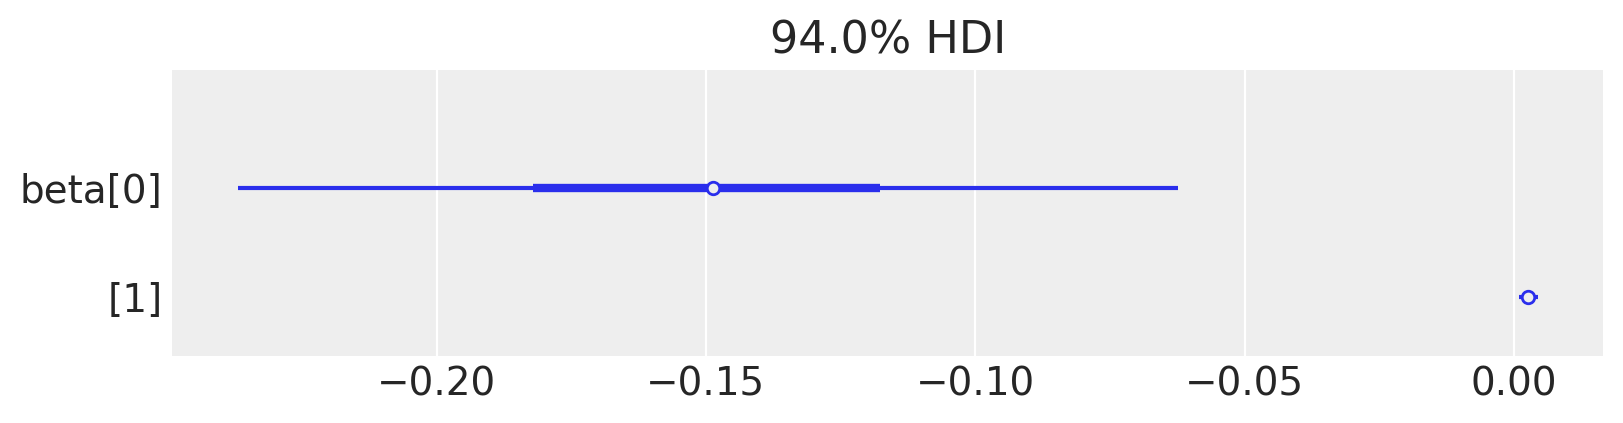

In [12]:
az.plot_forest(model.idata.posterior, var_names="beta", figsize=(8, 2), combined=True);

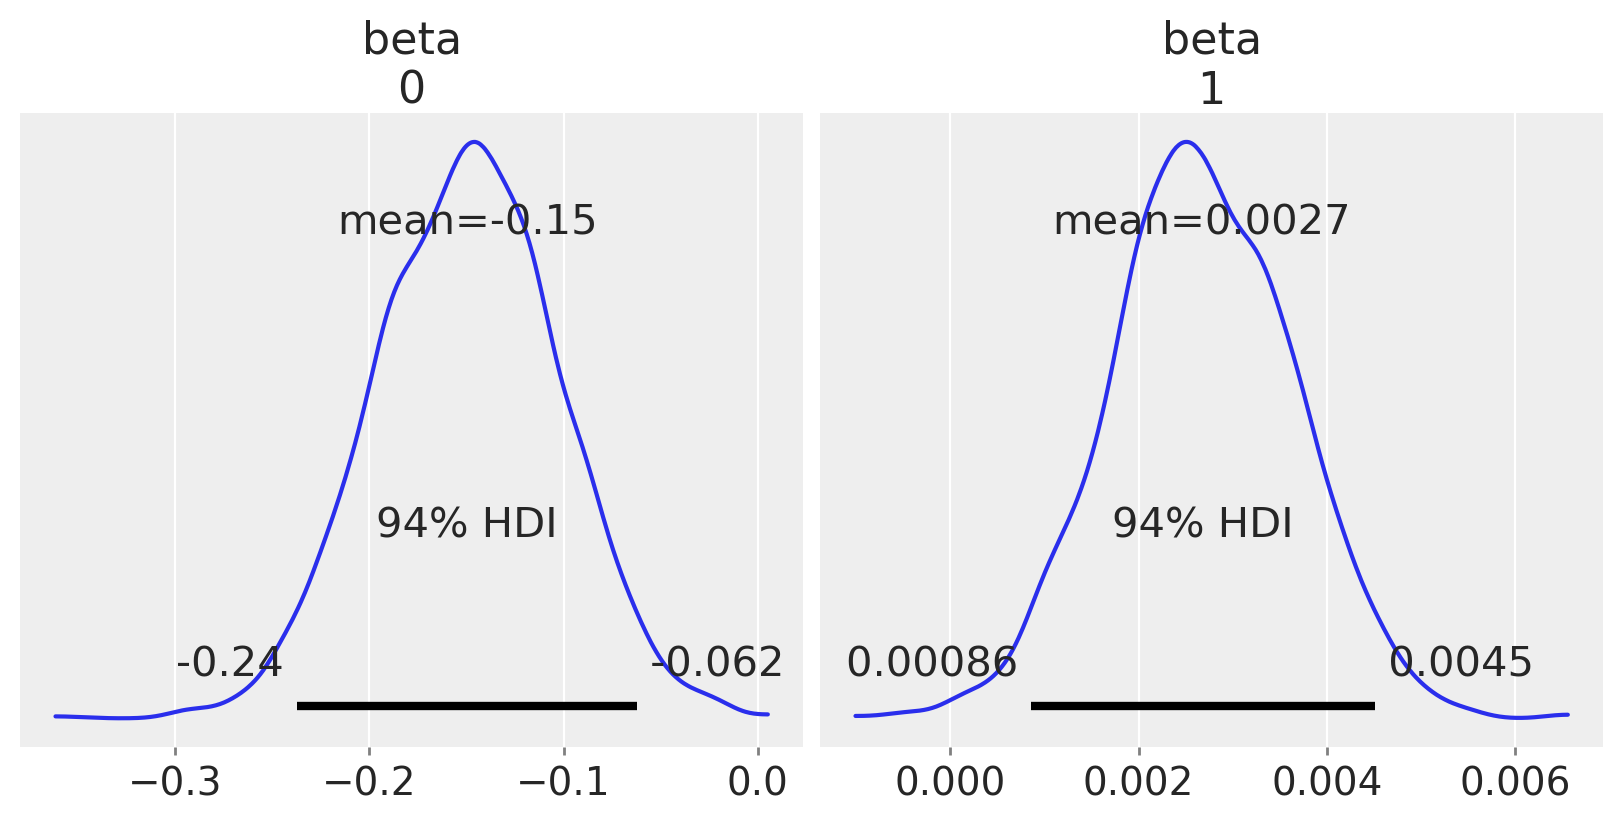

In [13]:
az.plot_posterior(model.idata.posterior['beta'], figsize=(8, 4));